In [6]:
from stesml.model_tools import train_model
from stesml.model_tools import test_model
from stesml.model_tools import get_T_from_h_results

from stesml.plot_tools import plot_results
from stesml.plot_tools import save_figures
from stesml.plot_tools import plot_average_error

from stesml.stes_model import stes_model

/Users/kmenear/Projects/sulfur_tes_ml/envSulfurTES/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [70]:
plot = False

In [71]:
# Model names
# NN model truncated at t <= 360: 'NN_20220708-22'
# NN model for full run time: 'NN_20220708-23'
# XGBoost model for full run time 'XGBoost_20220711-1554'
# XGBoost model truncated at t >= 360 'XGBoost_20220709-0914'

In [72]:
# Train the XGBoost model for t >= 360

data_dir = "../data/Sulfur_Models/heating/heating_all"
model_name = 'XGBoost_h_model'
model_type = 'XGBoost' # Options: NN, XGBoost, RandomForest
target = 'h' # Options: Tavg, h
metric = 'rmse' # Options: rmse, r2
scale = False # Normalize data to a mean of 0 and STD of 1
t_min = -1
truncated = False

In [73]:
train_model_ = False
save_model_ = False
load_model_ = True

In [74]:
if train_model_:
    parameters = stes_model.get_parameters(model_type, truncated)
    model, addendum = train_model(data_dir, model_type, target, scale, parameters, t_min=t_min)

In [75]:
if save_model_:
    stes_model.save_model(model, model_type, addendum)

In [76]:
if load_model_:
    model, addendum = stes_model.load_model(model_type, model_name)

In [77]:
for key, value in addendum.items():
    print(key, value)

train_index [ 0  1  2  3  4  5  6  7  8  9 11 13 14 15 16 18 19 20 21 25 26 27 29 30
 31 33 34 36 37 38 40 41 43 44 46 47 48 51 53 54 55 56 58 59 61 62 63 64
 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 83 84 85 86]
test_index [10 12 17 22 23 24 28 32 35 39 42 45 49 50 52 57 60 82]
scaler_X None
scaler_y None


In [78]:
t_min = 360 # If building final model, set t_min to -1 here
h_results = test_model(model, model_type, data_dir, target, scale, addendum, t_min=t_min)

RMSE: 2.4462595, R2: 0.9555690


In [42]:
h_df = h_results['test_df']

In [43]:
if plot:
    (h_df['h'] - h_df['h_hat']).hist(bins=20, range=(-30, 30))

In [44]:
if plot:
    figures = plot_results(h_df, model_type, target='h')

In [45]:
if plot:
    figures['AverageError'] = plot_average_error(h_df, target=target)

In [15]:
figures_directory = save_figures(figures)

In [7]:
# Train the NN model for t <= 360

data_dir = "../data/Sulfur_Models/heating/heating_all"
model_name = 'NN_T_model_tLessThan360'
model_type = 'NN' # Options: NN, XGBoost, RandomForest
target = 'Tavg' # Options: Tavg, h
metric = 'rmse' # Options: rmse, r2
scale = True # Normalize data to a mean of 0 and STD of 1
t_max=360
truncated=True

In [8]:
train_model_ = False
save_model_ = False
load_model_ = True

In [9]:
if train_model_:
    parameters = stes_model.get_parameters(model_type, truncated)
    model, addendum = train_model(data_dir, model_type, target, scale, parameters, t_max=t_max)

In [10]:
if save_model_:
    stes_model.save_model(model, model_type, addendum)

In [11]:
if load_model_:
    model, addendum = stes_model.load_model(model_type, model_name)

2022-07-25 11:50:24.738527: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [12]:
t_max = 360 # If building final model, set t_max to -1 here
T_results = test_model(model, model_type, data_dir, target, scale, addendum, t_max=t_max)

2022-07-25 11:50:34.132922: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)


RMSE: 0.3004480, R2: 0.9999730


In [59]:
for key, value in addendum.items():
    print(key, value)

train_index [ 0  1  2  3  4  5  6  7  8  9 11 13 14 15 16 18 19 20 21 25 26 27 29 30
 31 33 34 36 37 38 40 41 43 44 46 47 48 51 53 54 55 56 58 59 61 62 63 64
 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 83 84 85 86]
test_index [10 12 17 22 23 24 28 32 35 39 42 45 49 50 52 57 60 82]
scaler_X StandardScaler()
scaler_y StandardScaler()


In [15]:
T_df = T_results['test_df']

In [61]:
h_df['Tavg_hat'] = T_df['Tavg_hat']

In [13]:
plot  = True

In [62]:
if plot:
    avg_error = plot_average_error(T_df, target=target)

In [63]:
if plot:
    (T_df['Tavg'] - T_df['Tavg_hat']).hist(bins=20, range=(-30, 30))

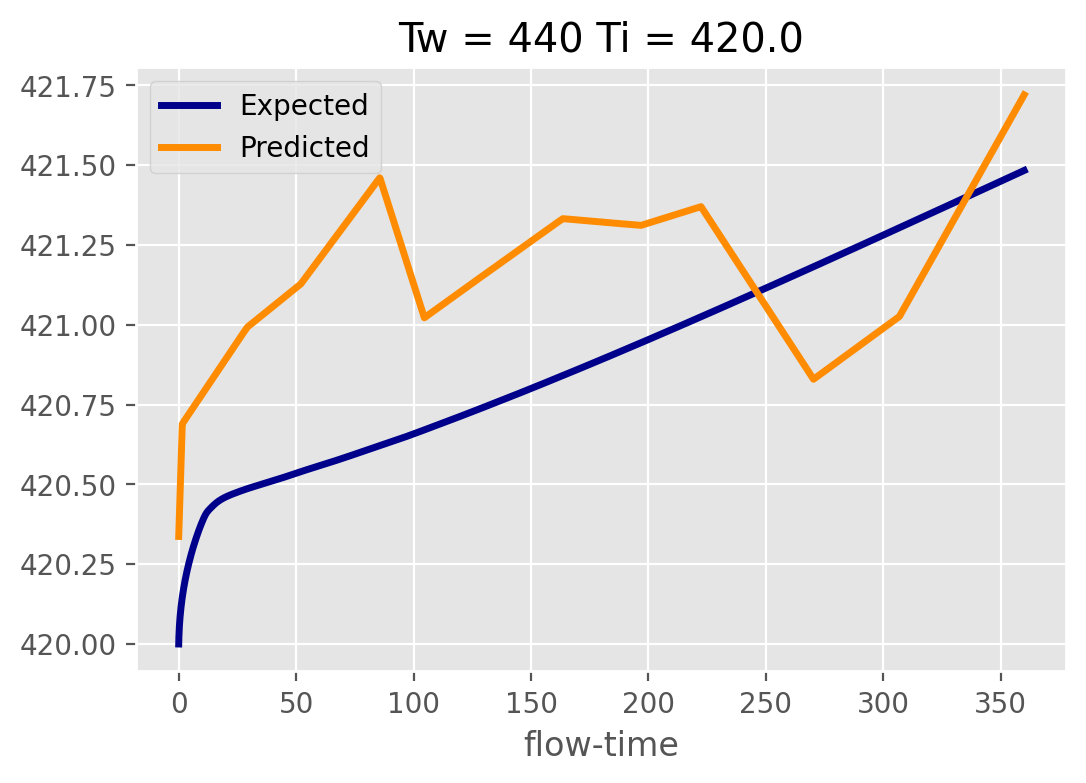

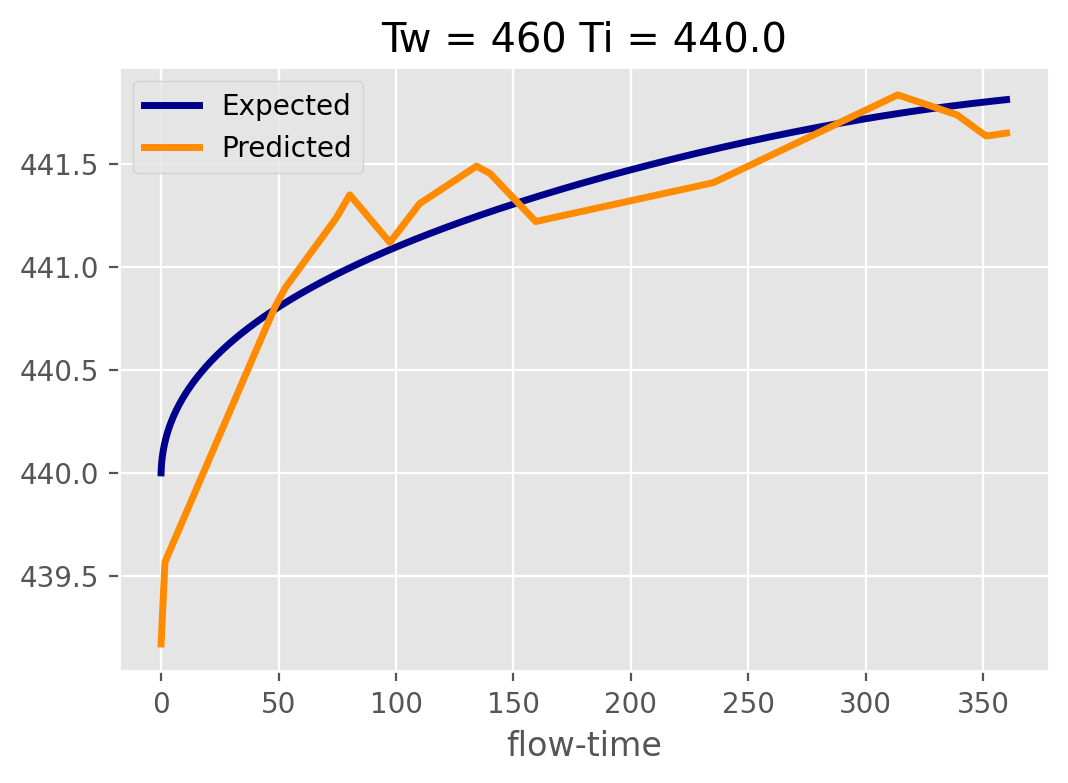

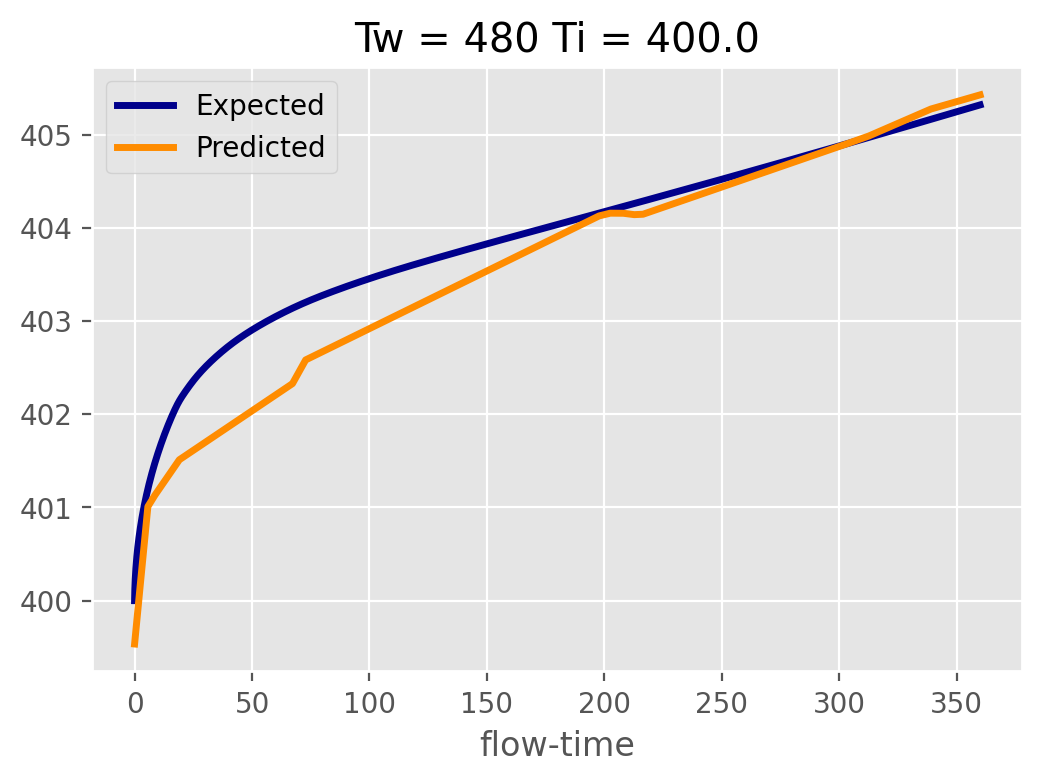

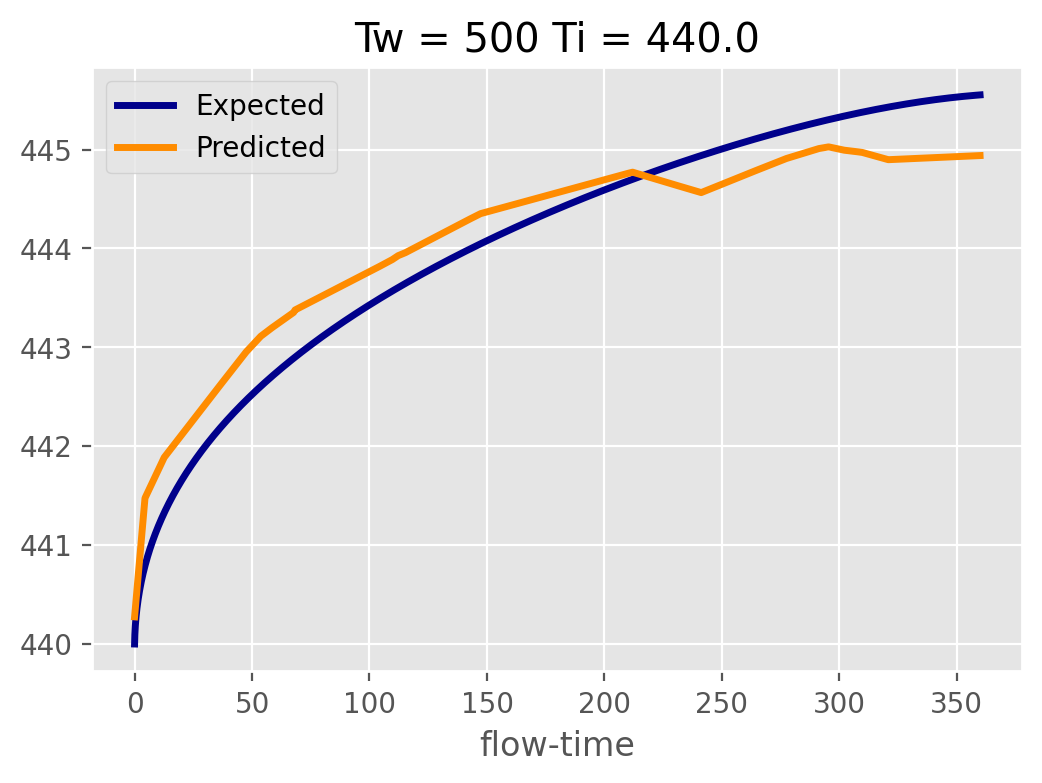

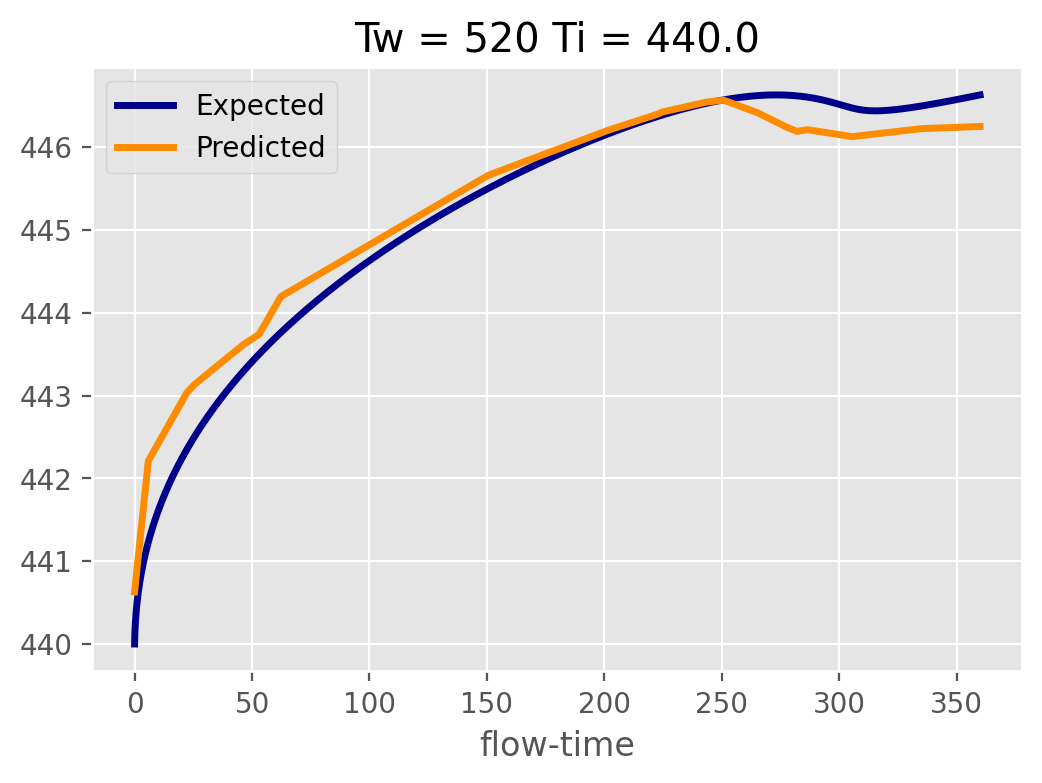

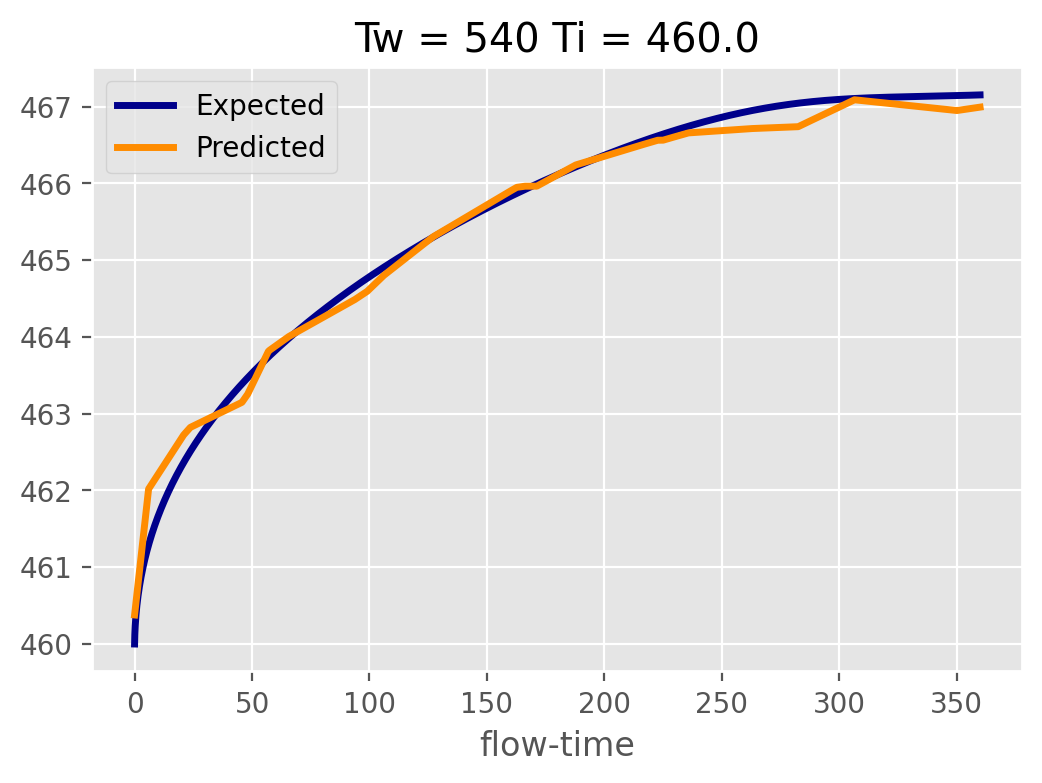

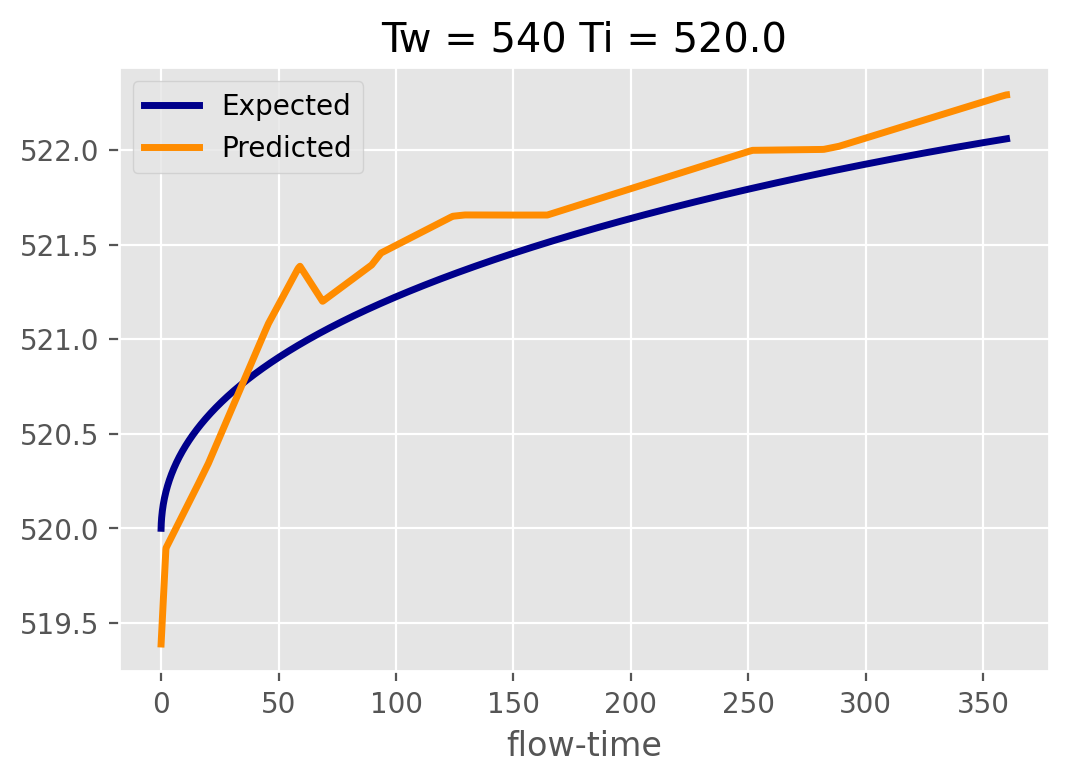

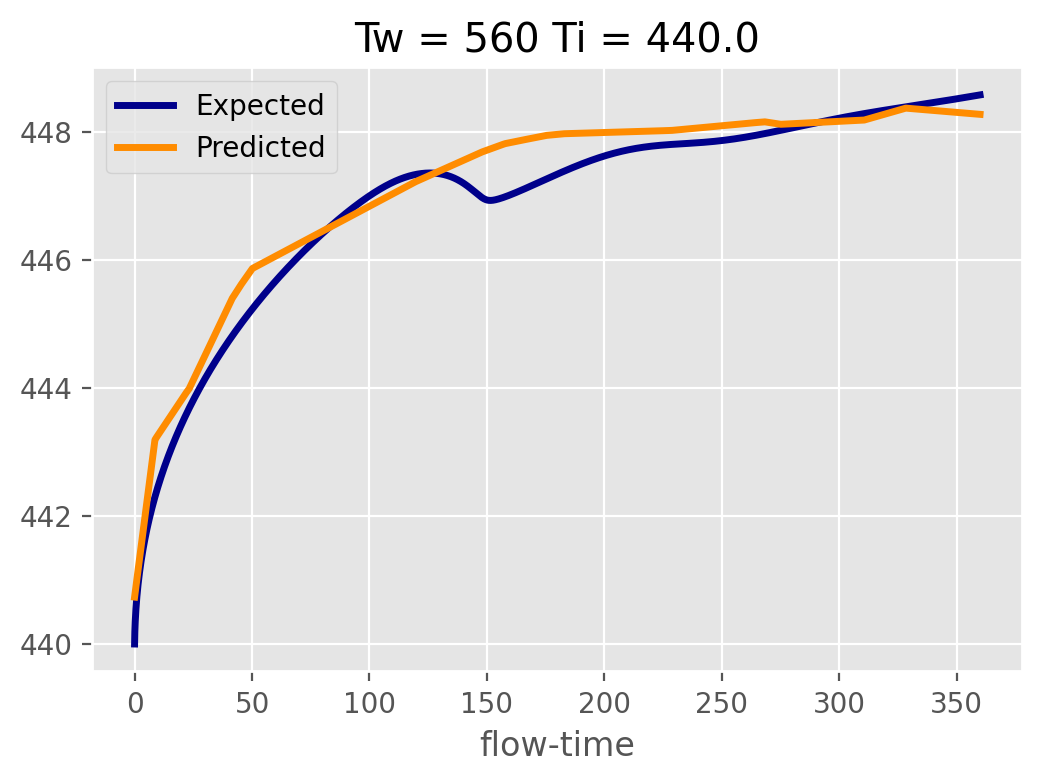

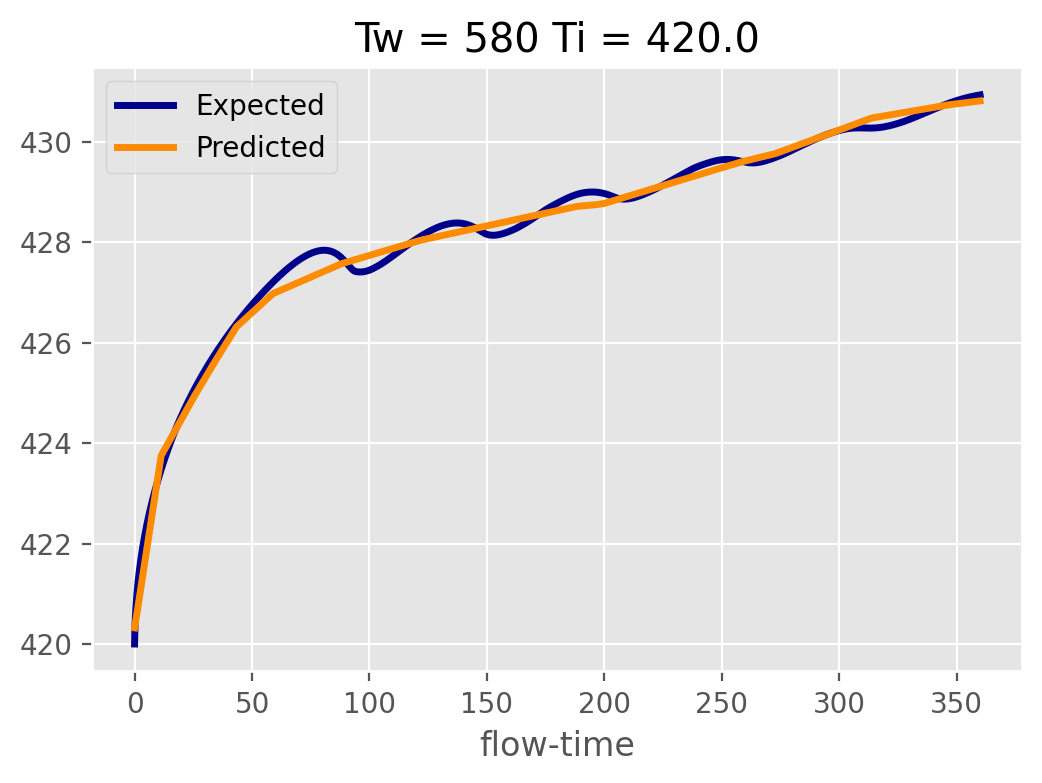

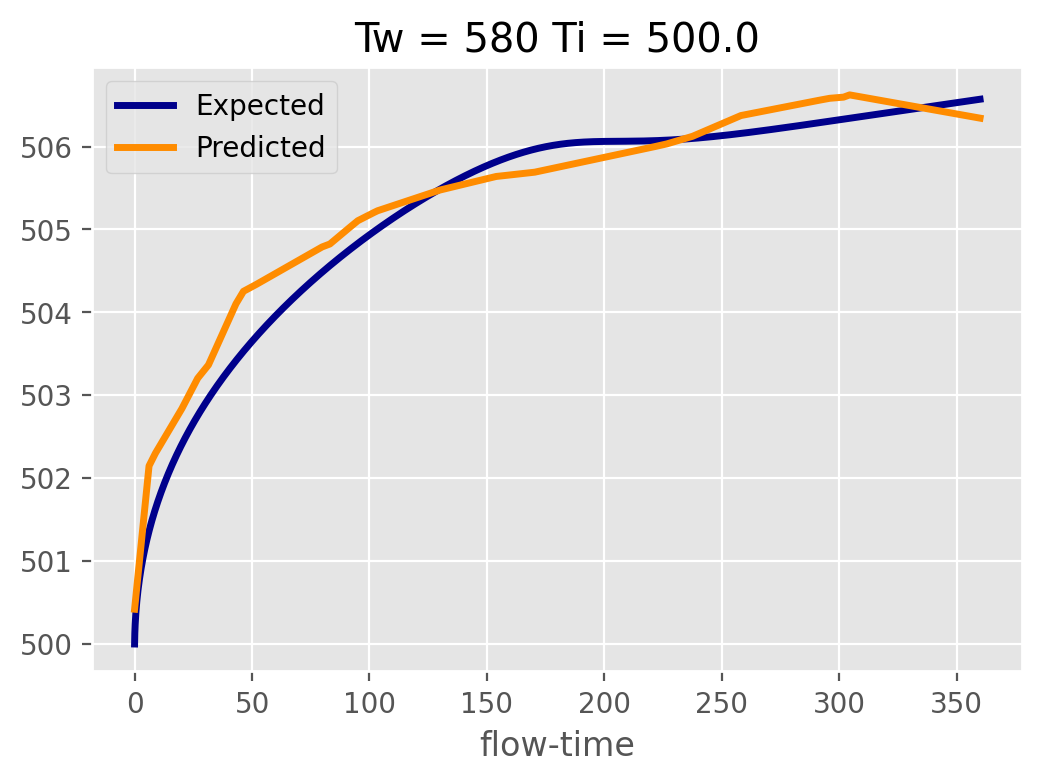

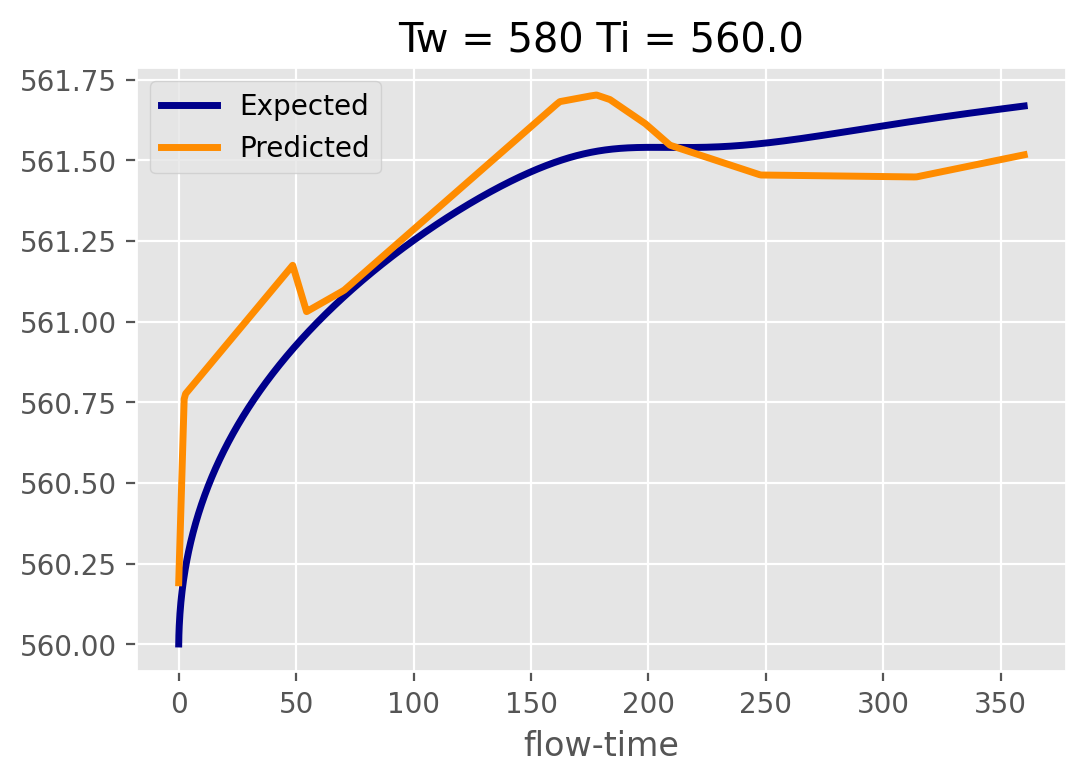

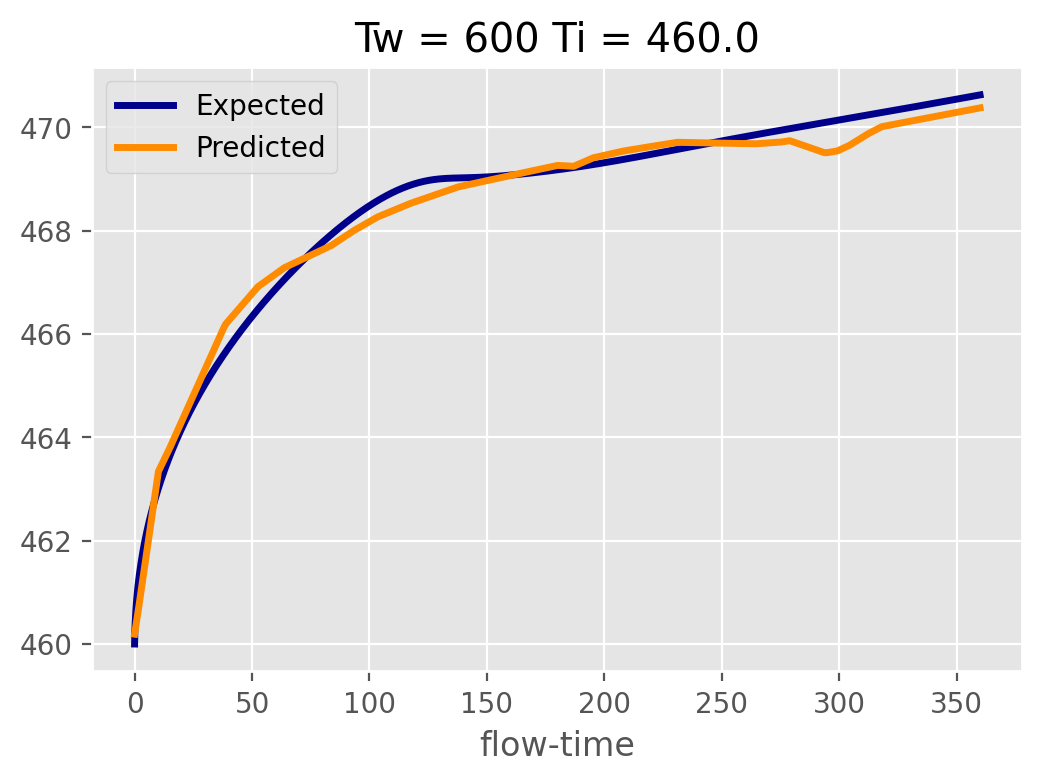

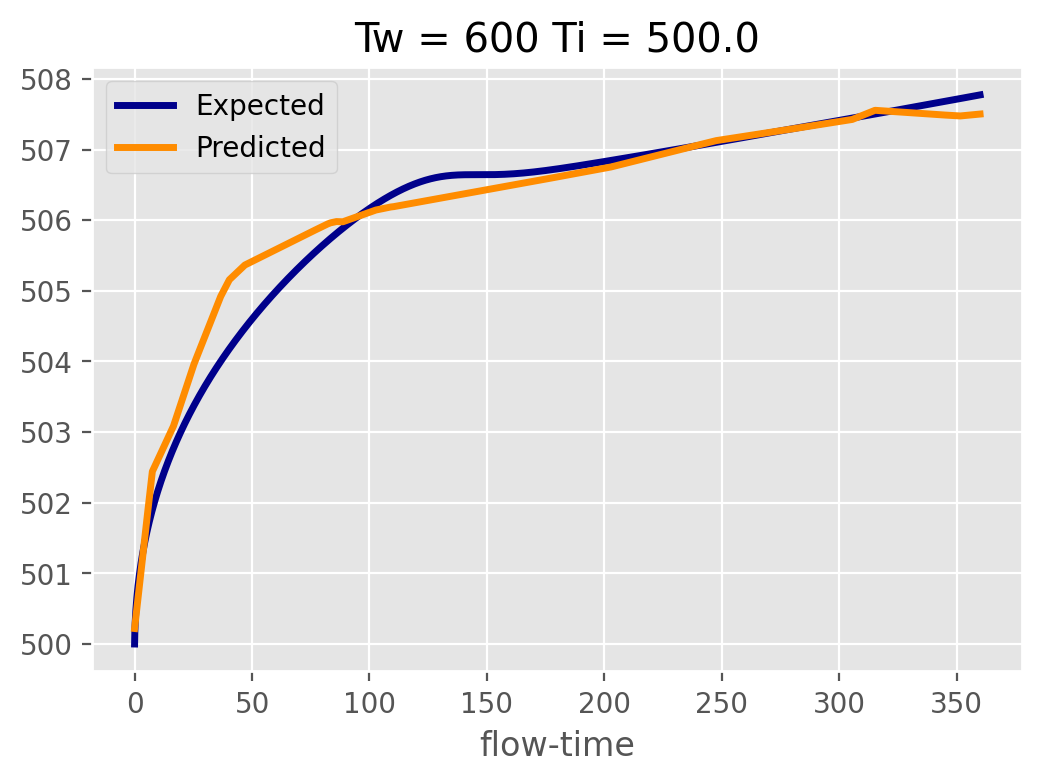

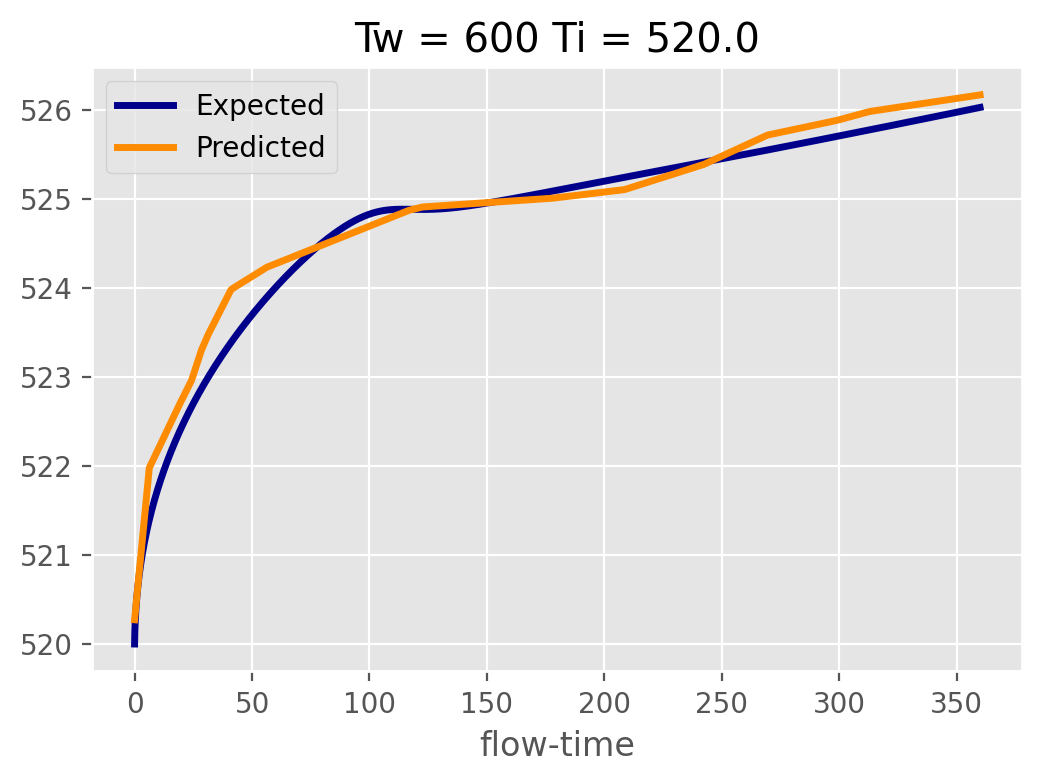

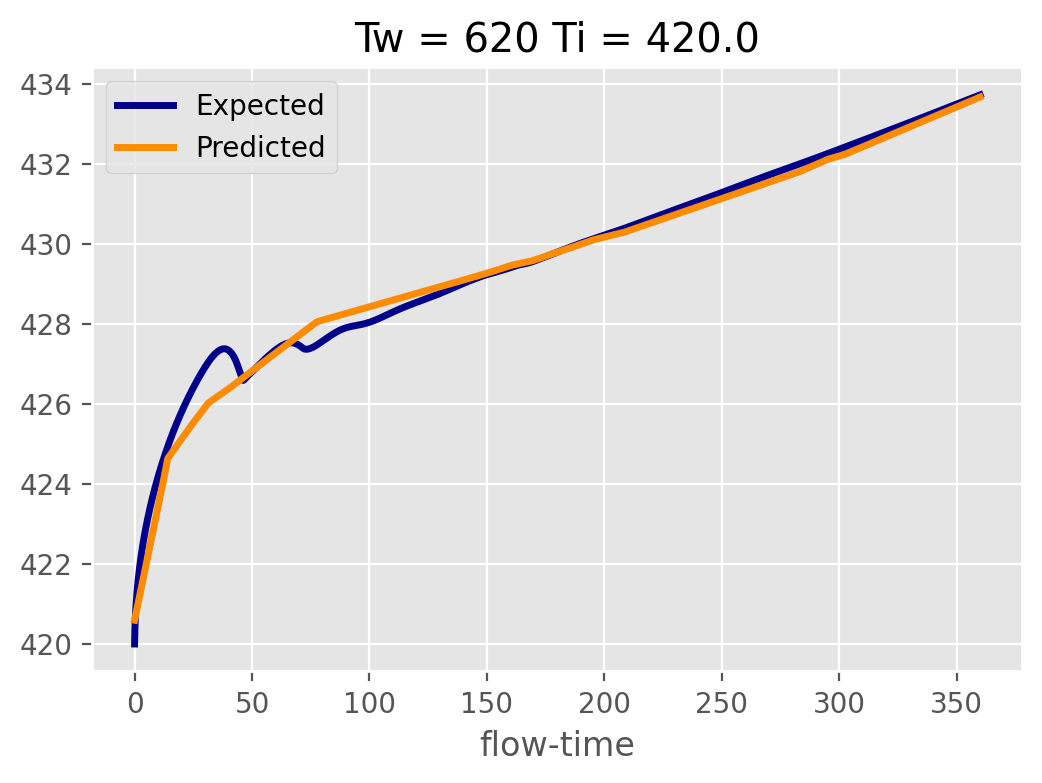

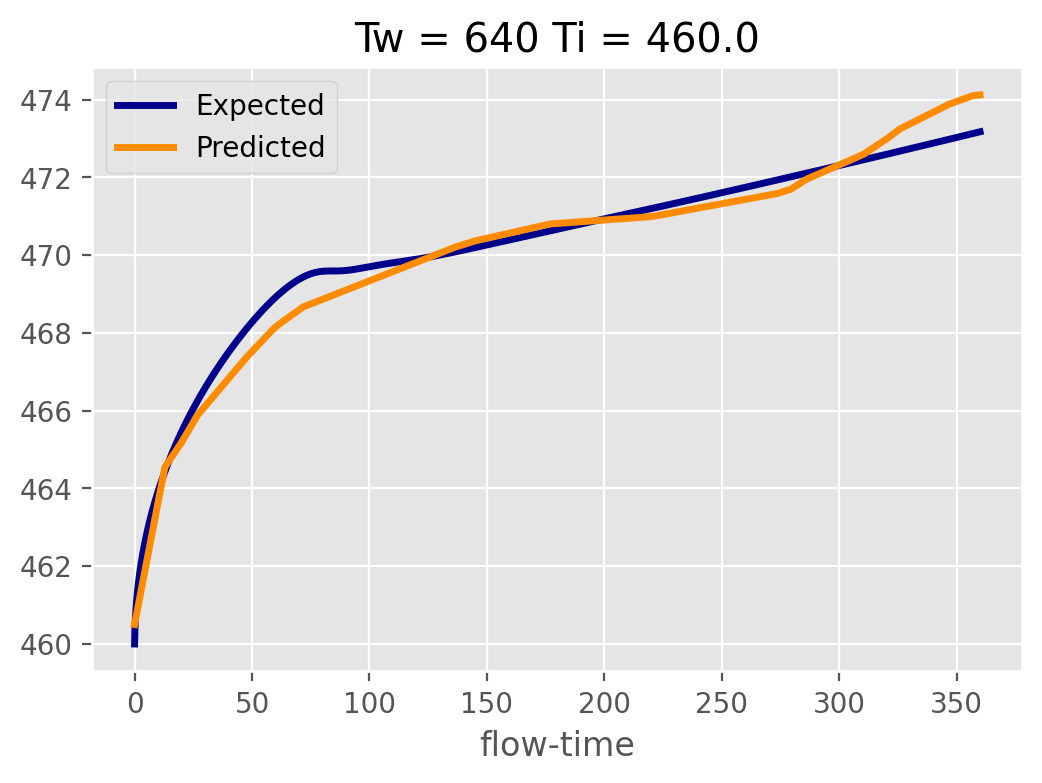

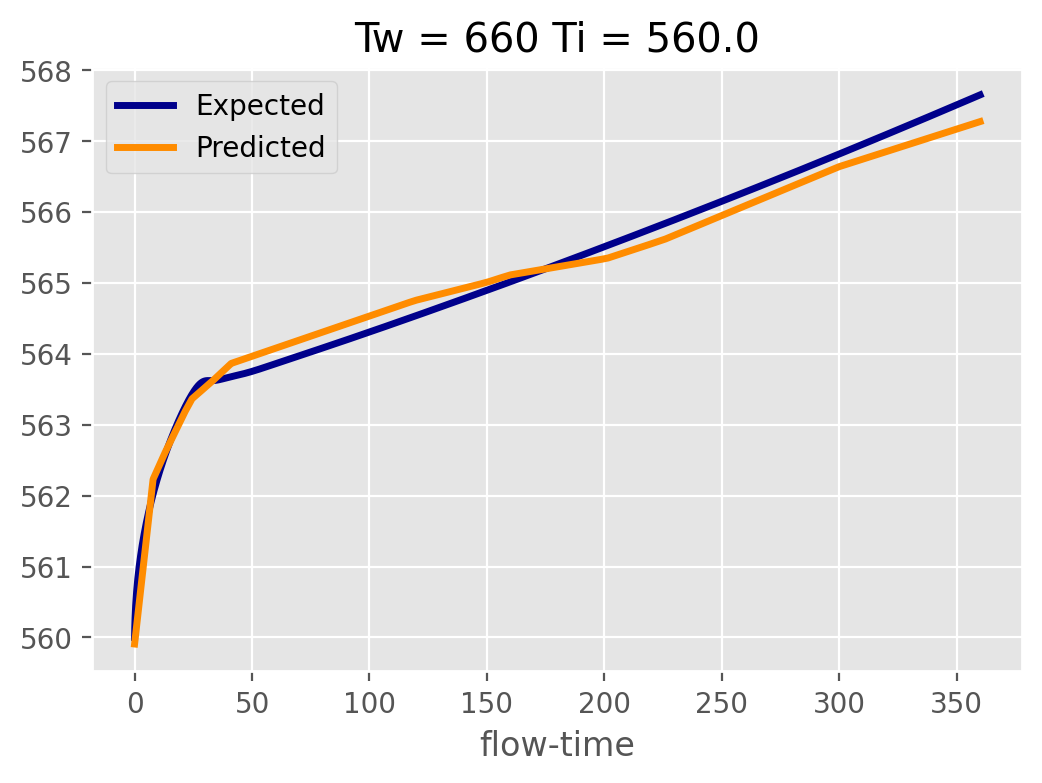

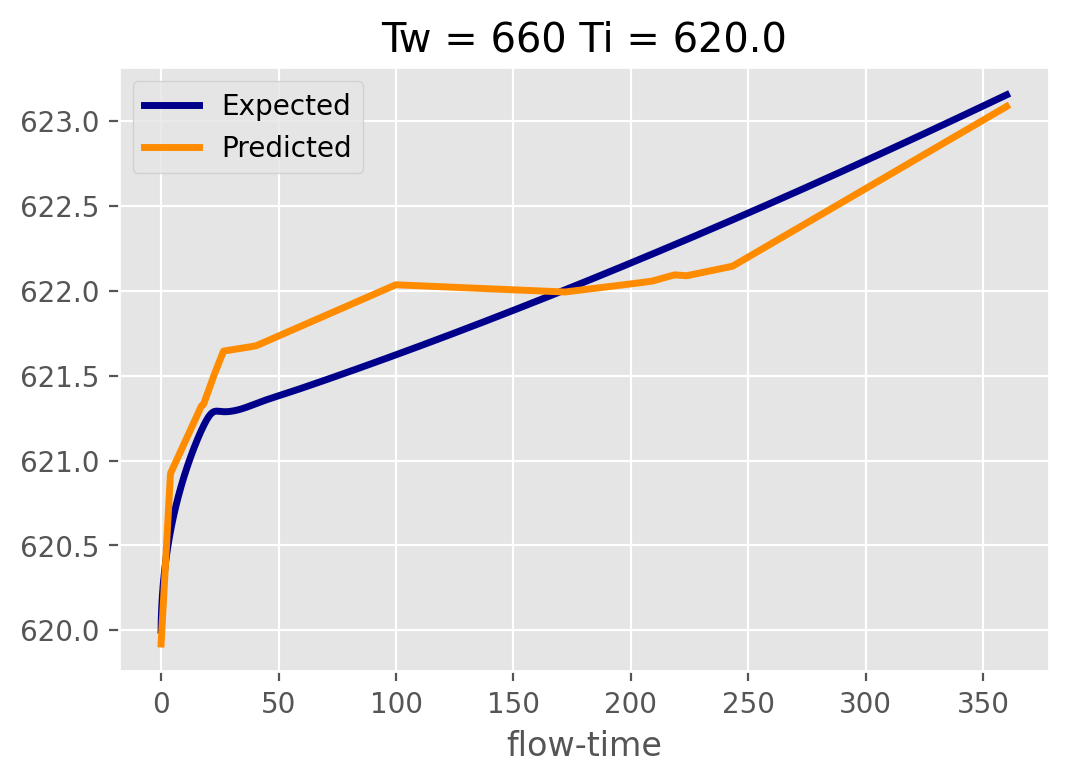

In [17]:
if plot:
    plot_results(T_df, target='Tavg')

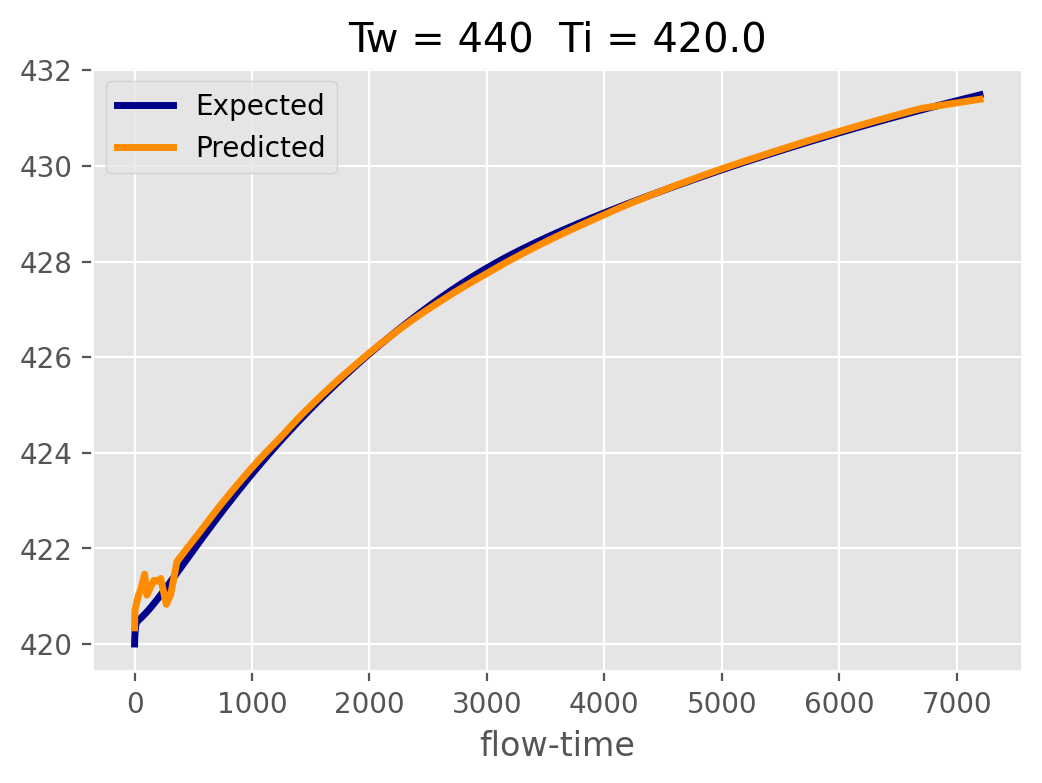

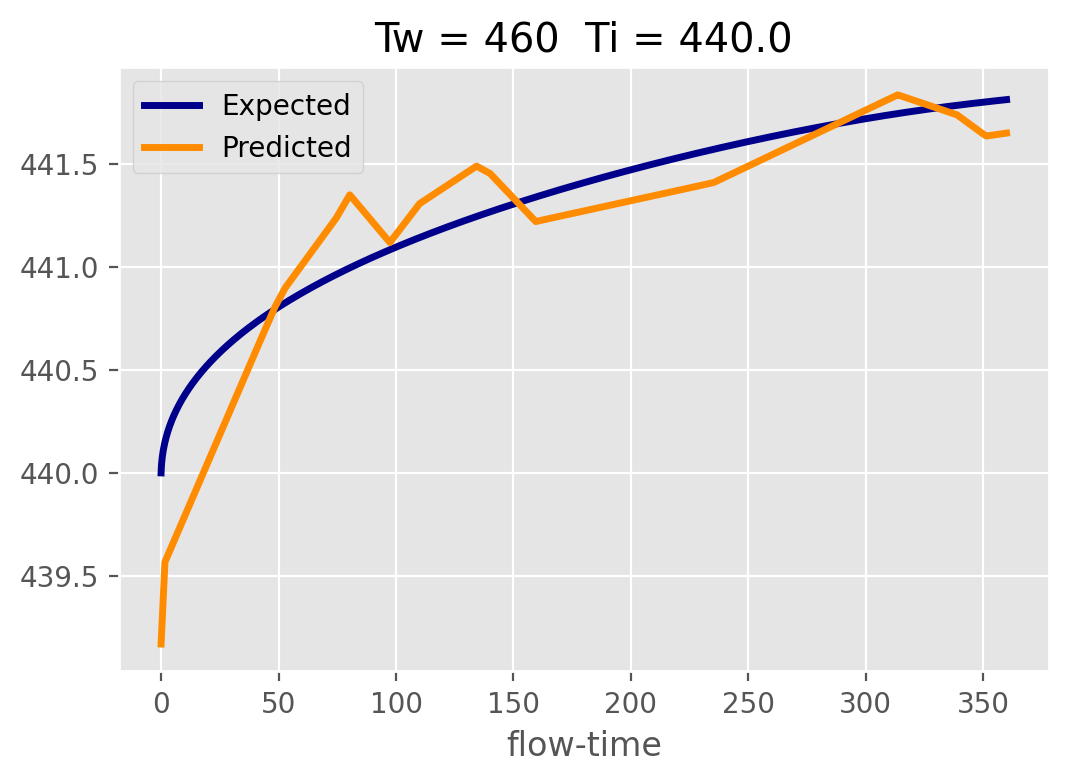

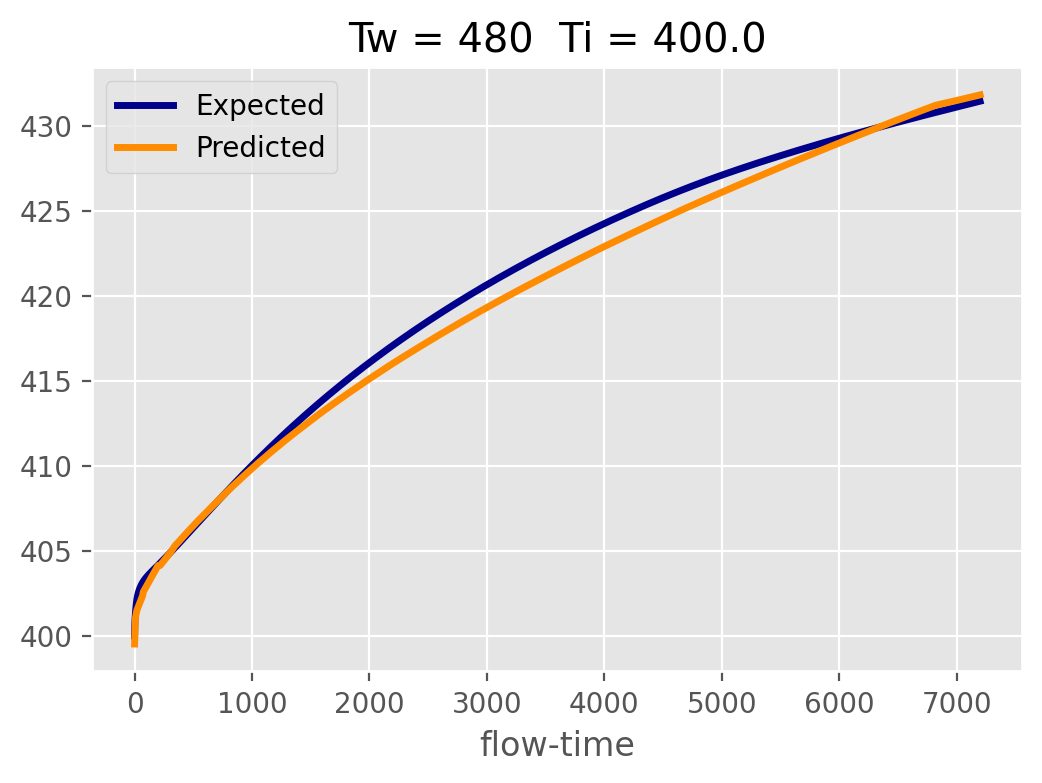

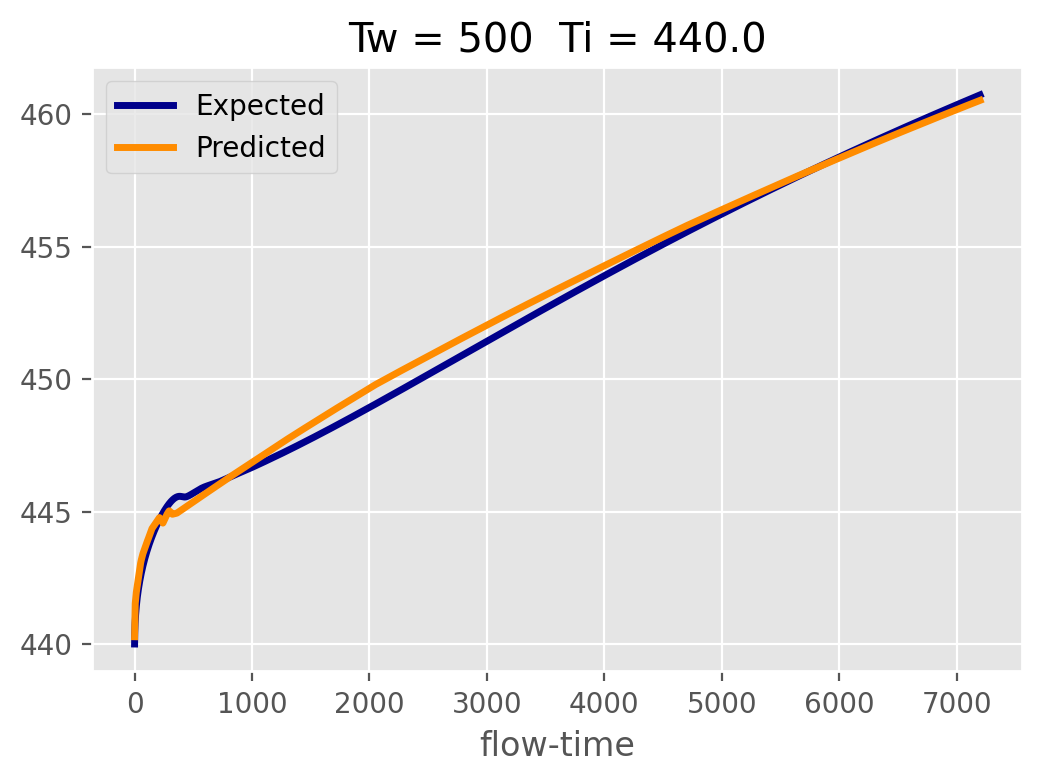

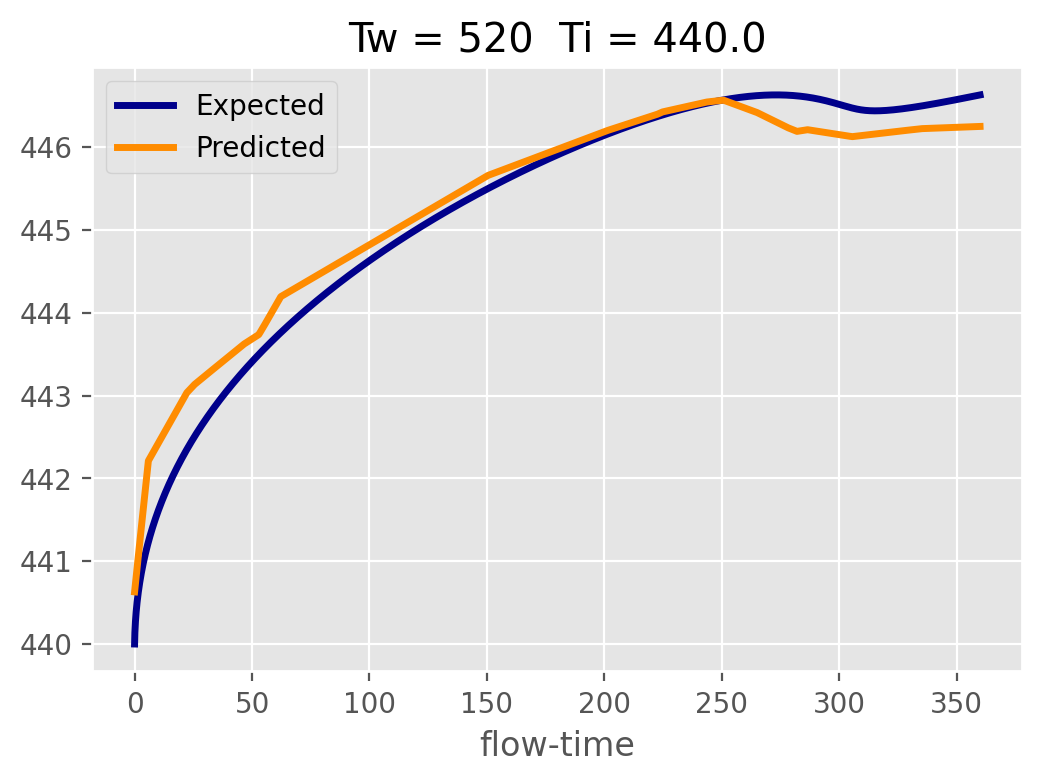

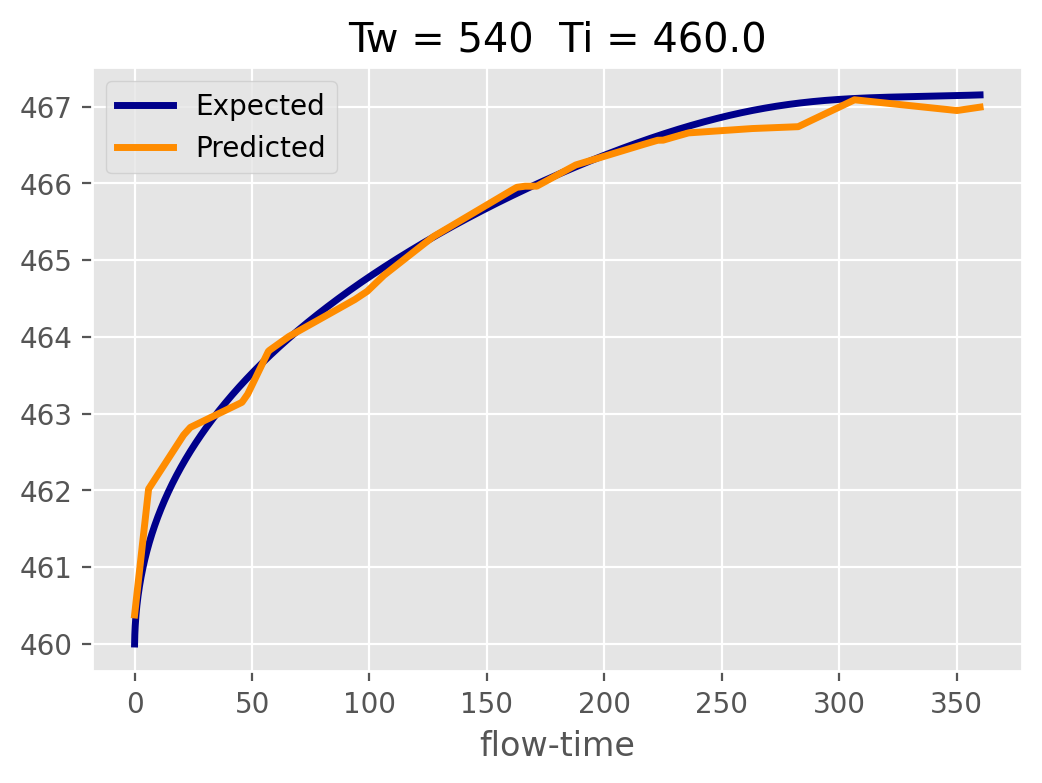

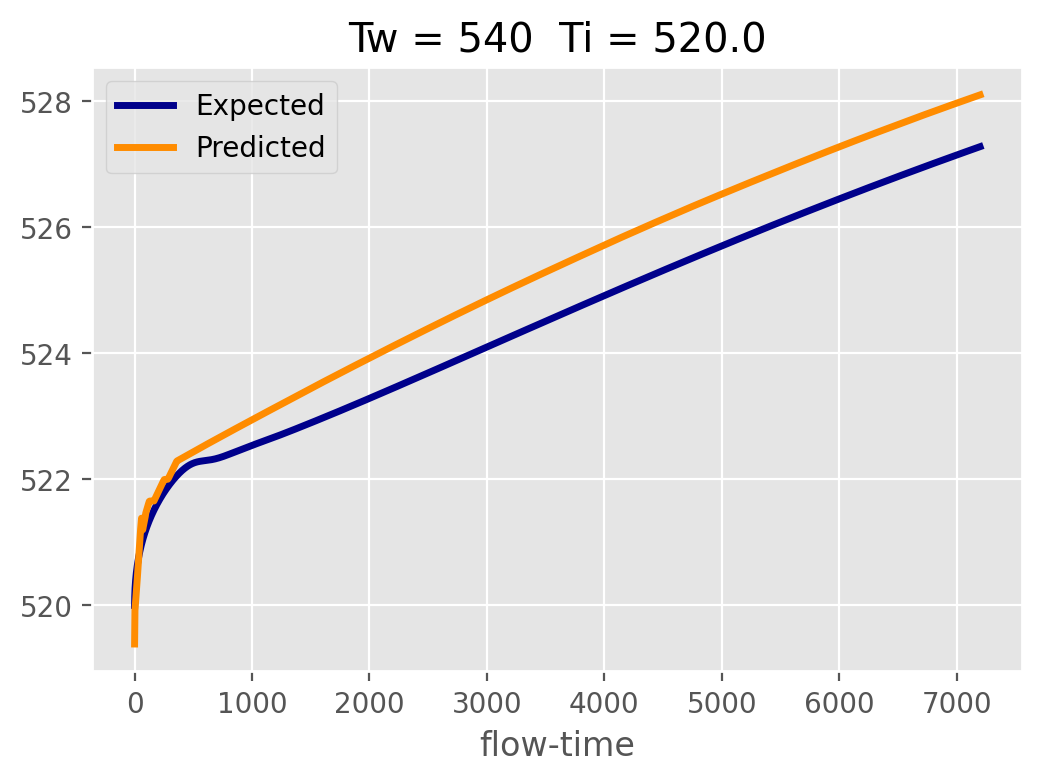

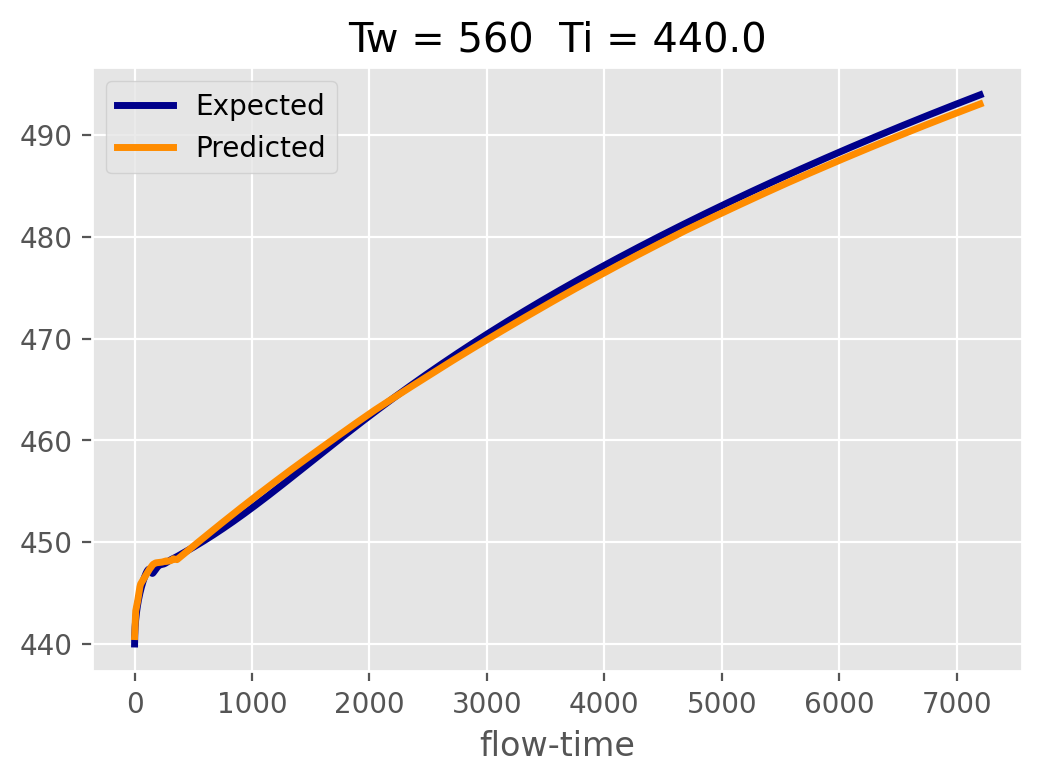

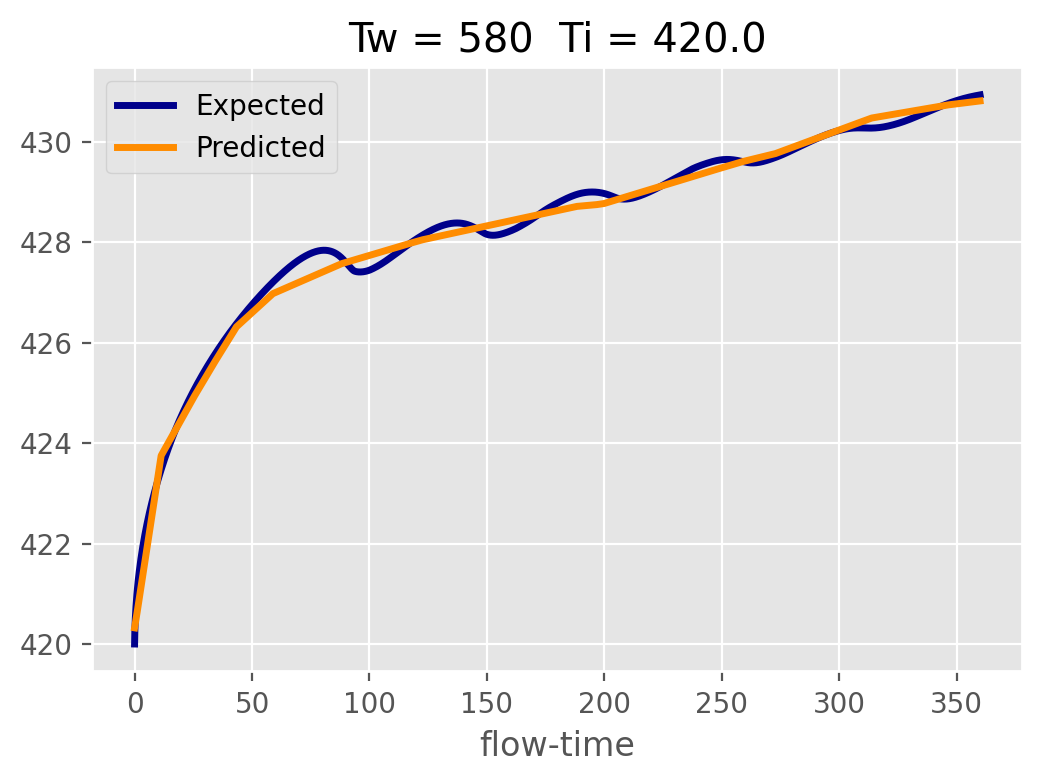

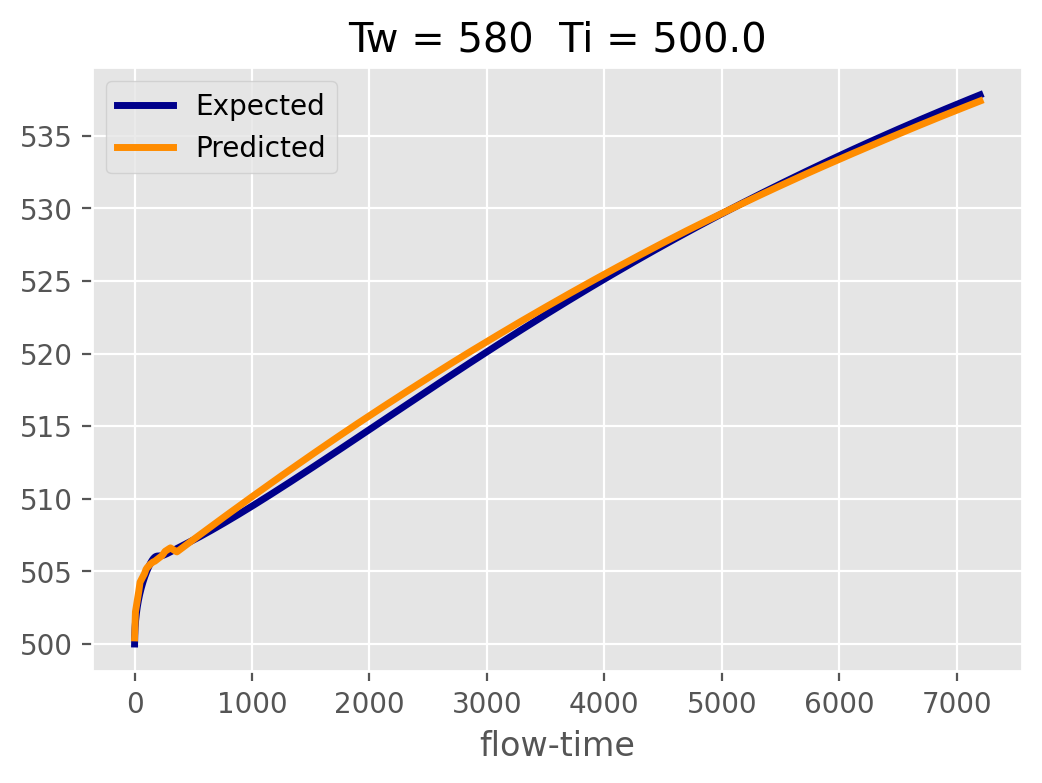

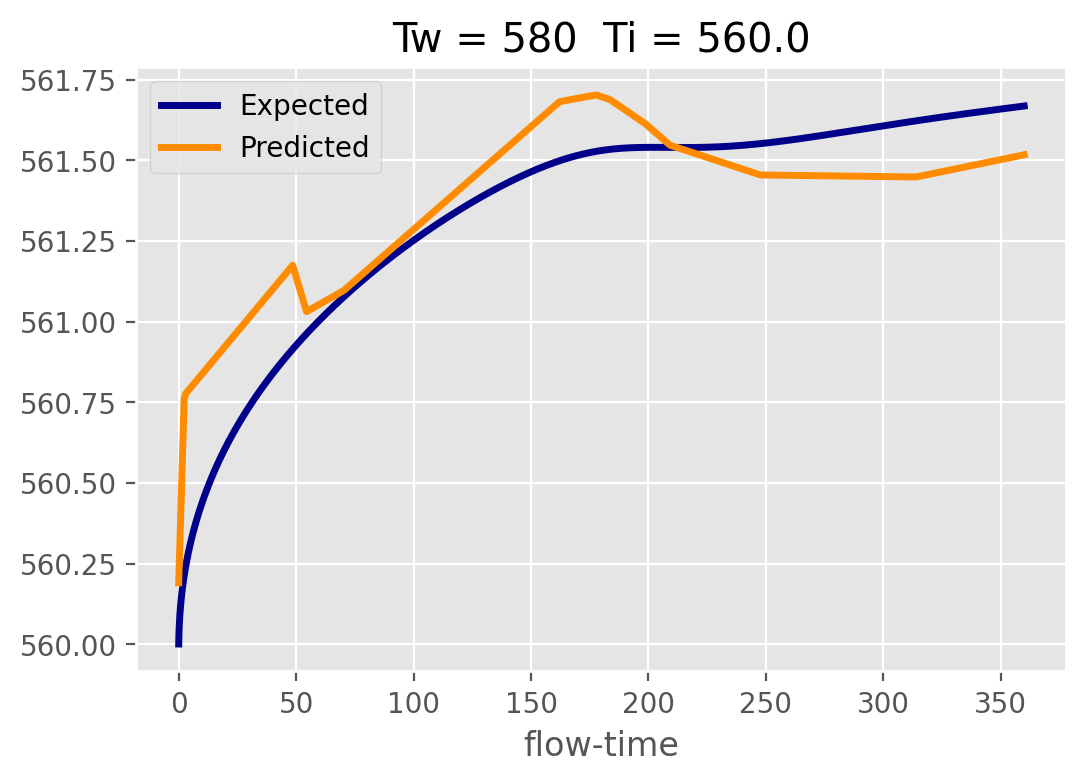

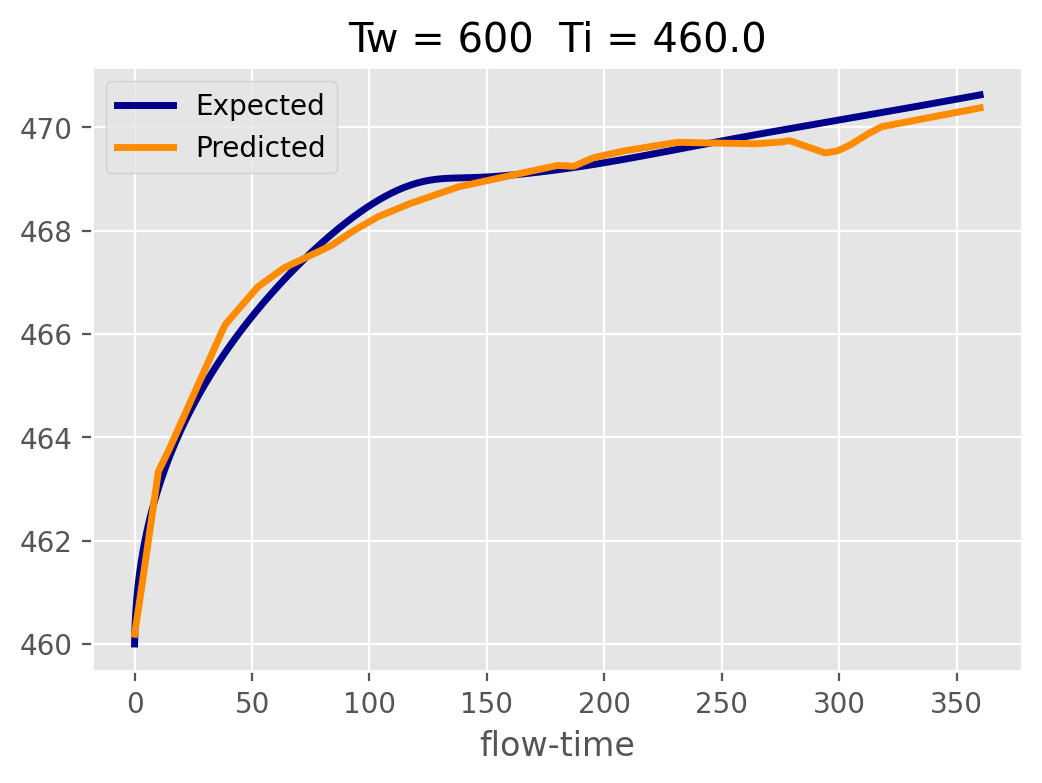

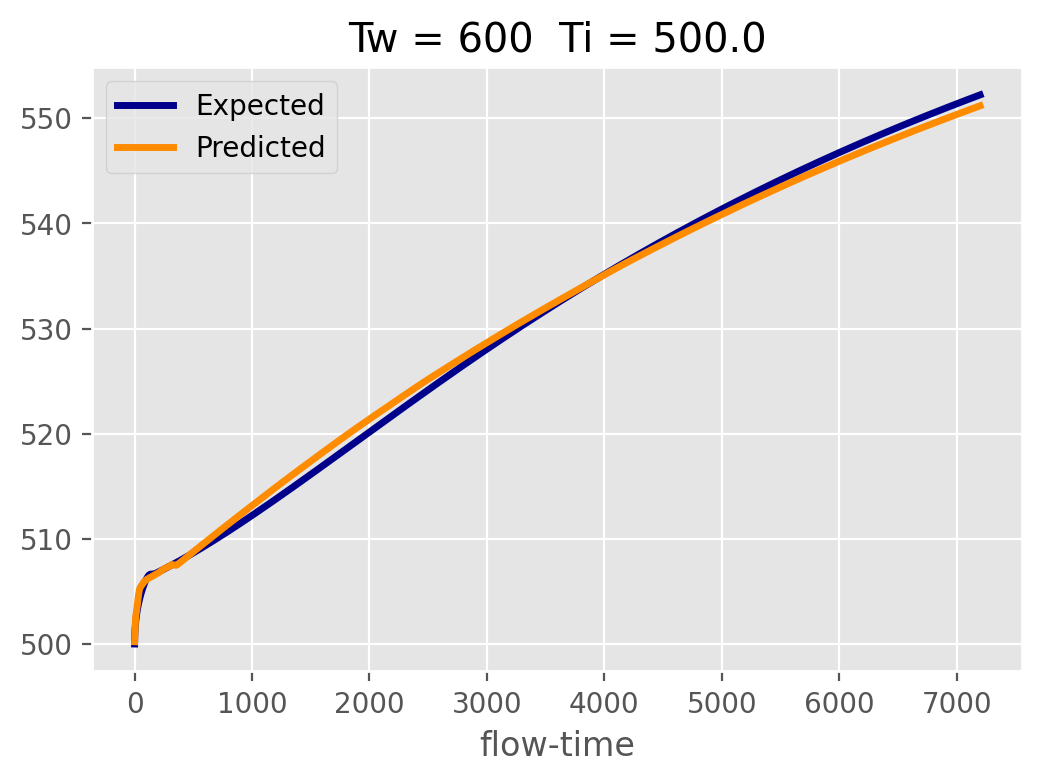

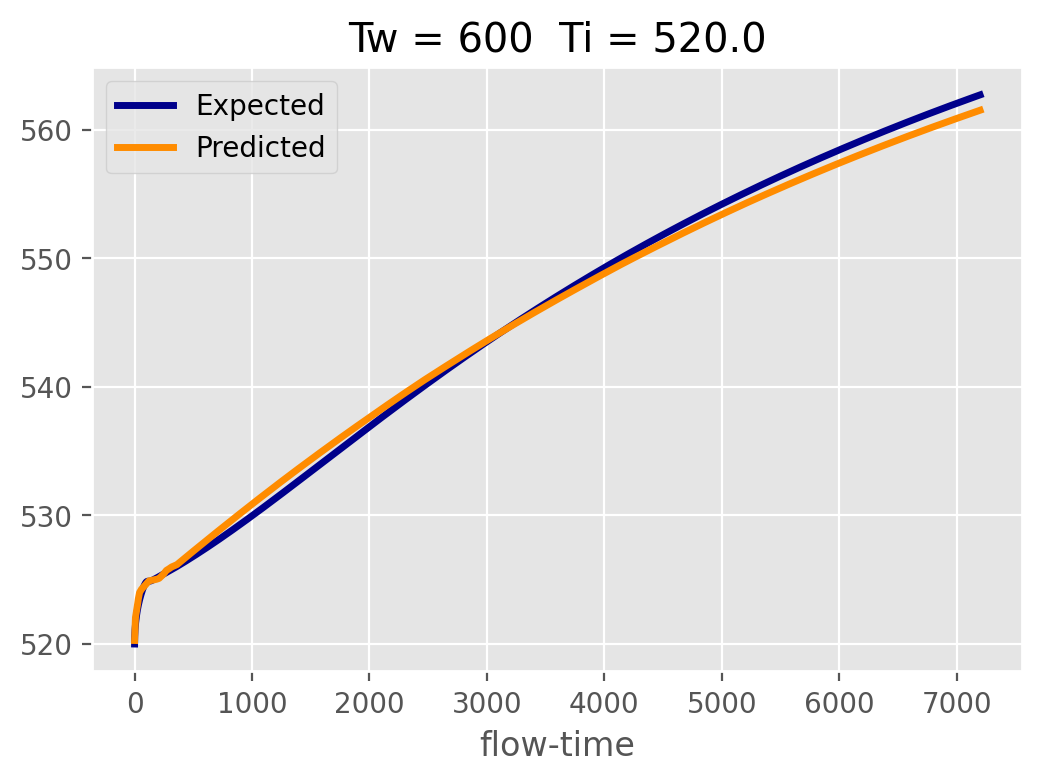

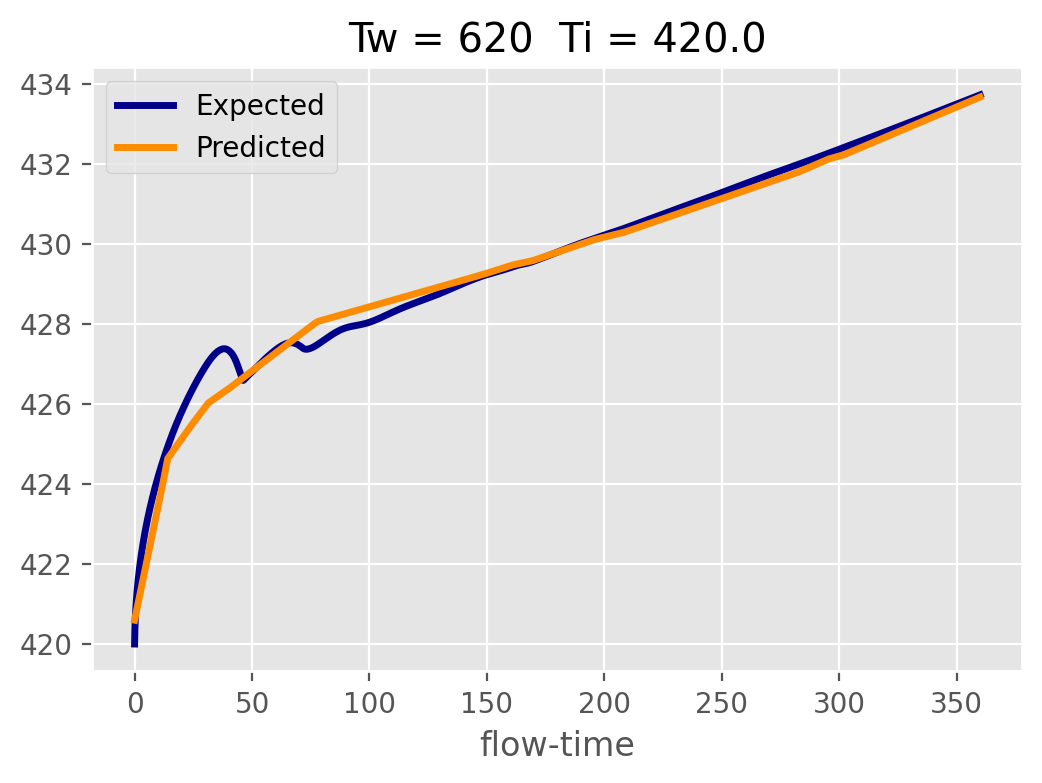

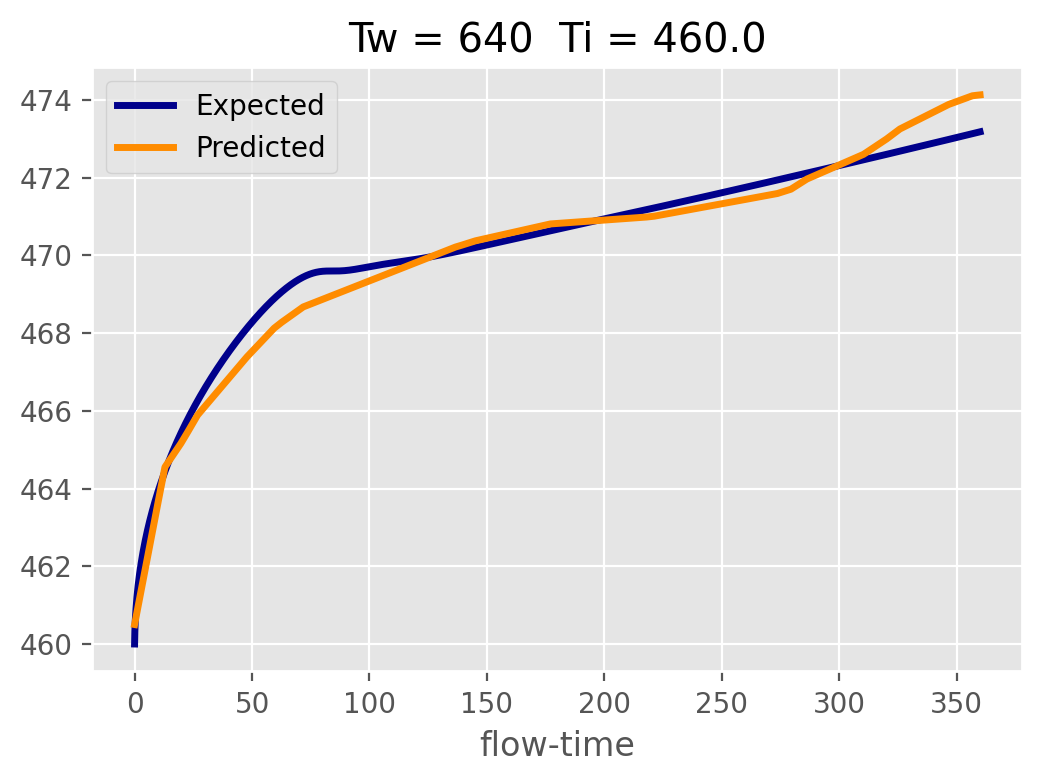

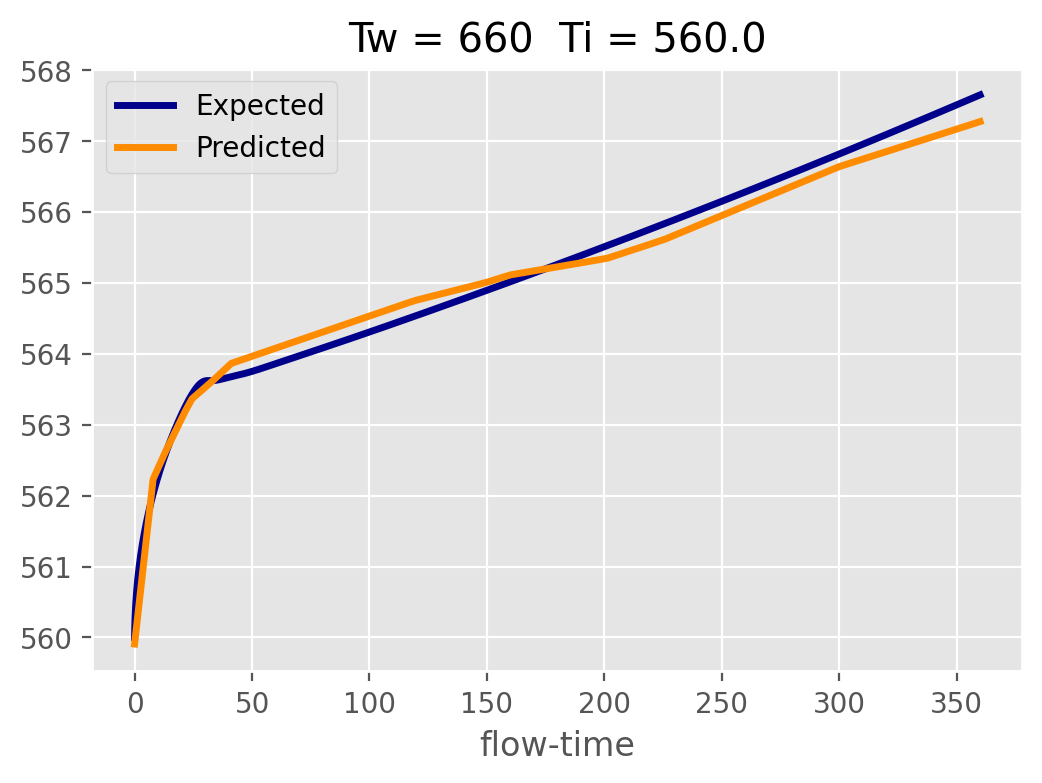

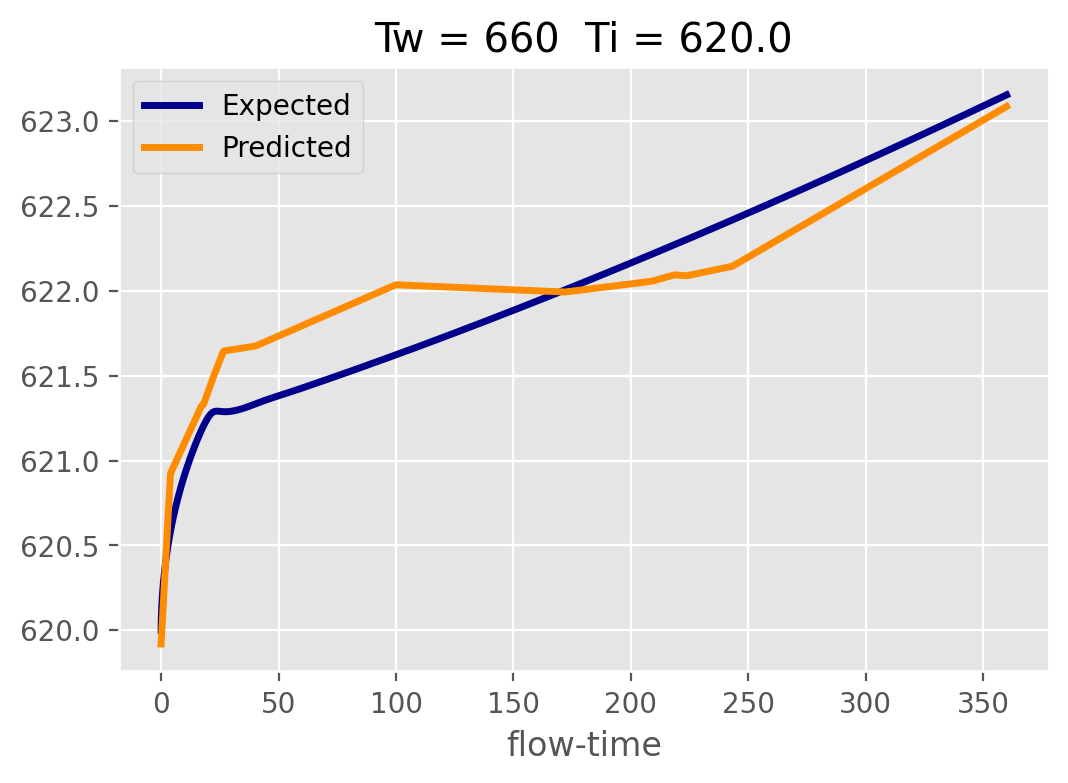

In [65]:
rmse, r2 = get_T_from_h_results(h_df, plot=True, hybrid_model=True, hybrid_split_time=360)

In [66]:
print(rmse)

0.6367832523937715


In [67]:
print(r2)

0.9998292328786111
